In [131]:
# Compare SV callers' output in Venn/UpSetR diagrams. Uses a VCF file obtained by SURVIVOR merge of the call sets.

In [132]:
library(venn)

In [133]:
library(UpSetR)

In [134]:
library(vcfR)

In [135]:
callers<-c("Manta", "DELLY", "LUMPY", "GRIDSS")

In [136]:
vcf<-read.vcfR('all.vcf', verbose = FALSE)

In [137]:
binvec<-sapply(strsplit(sapply(strsplit(getFIX(vcf, getINFO=TRUE)[, 'INFO'], ";"),
                       function(x) {x[2]}), '='), function (x) {x[2]})

In [138]:
#binvec

In [139]:
vec<-table(sapply(binvec, function(x) {strtoi(x, base=2)}))

In [140]:
#vec

In [141]:
lst<-strsplit(binvec, '')

In [142]:
#lst

In [143]:
s<-as.character(seq(0,(2**length(callers)-1)))

In [144]:
#s

In [145]:
N<-sapply(s, function(x){vec[x]}, USE.NAMES=FALSE)

In [146]:
N[is.na(N)]<-0

In [147]:
#N

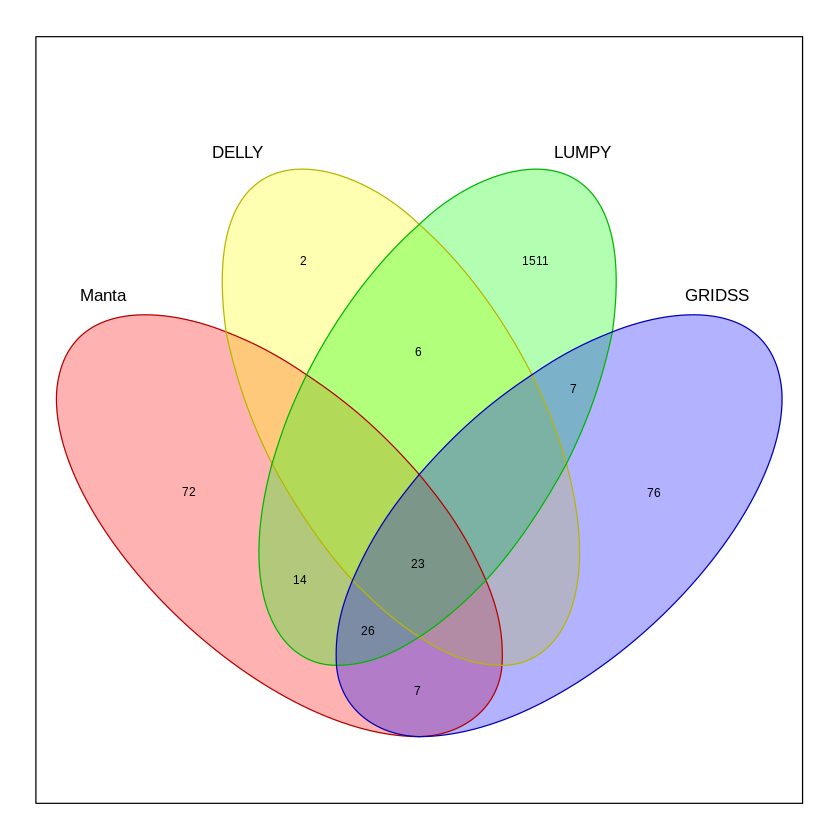

In [148]:
venn(4, counts=N, snames=callers, ilabels=TRUE, zcolor="style", ellipse=TRUE)

In [149]:
nr<-length(lst)

In [150]:
#nr

In [151]:
nc<-length(lst[[1]])

In [152]:
#nc

In [153]:
M<-matrix(0, nrow=nr, ncol=nc)

In [154]:
for (i in 1:nr)
{
  M[i, ] <- as.integer(lst[[i]])
}

In [155]:
#M

In [156]:
sv<-data.frame(ID = getFIX(vcf)[, 'ID'], M)

In [157]:
#colnames(sv)

In [158]:
colnames(sv)[-1]<-callers

In [159]:
#colnames(sv)

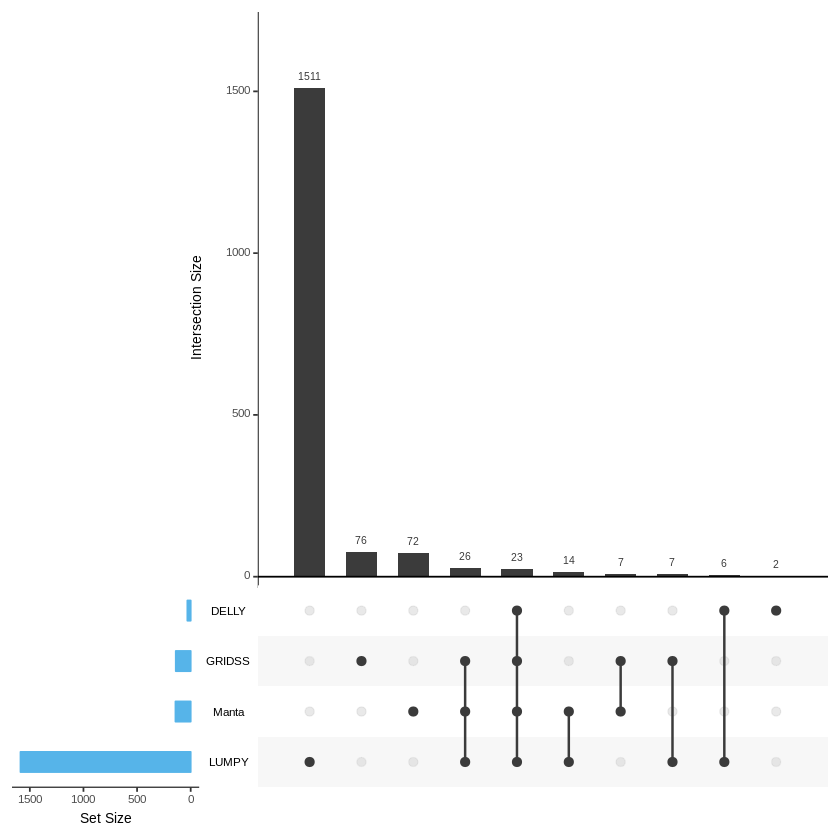

In [160]:
upset(sv, nsets = length(callers), sets.bar.color = "#56B4E9", order.by = "freq")